# Imports

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import viewdat_cno_lib as vdl

In [21]:
def obs_read(fname:str):
    '''
    '''
     # Import the data into a Pandas DataFrame, and do some cleanup
        #Week    Time    	Offset   	RAIM	  SV	FDMA	SVChan	SVType	SVFlags	   Az	  El	Freq	Track	     Phase       	     Range       	 Doppler 	 CNo 	 Count	 Flags	Antenna	TrackState	ScintFlags
        #2324	327600.000	0.000000	  96	  29	   0	  14	0	    0	       168.0  20.0	0	    0	        -124876027.19739	 23763131.17236	-3791.844	39.60	  176	 9887	   0	16	        18

    dtypes = {
            '%  Week': int,
            'Time': float,
            'offset': float,
            'RAIM': int,
            'SV': int,
            'FDMA': int,
            'SVChan': int,
            'SVType': int,
            'SVFlags': int,
            'Az': float,
            'El': float,
            'Freq': int,
            'Track': int,
            'Phase': float,
            'Range': float,
            'Doppler': float,
            'CNo': float,
            'Count': int,
            'Flags': int,
            'Antenna': int,
            'TrackState': int,
            'ScintFlags': int,
            }

    line_no = 0
    with open(fname) as file:
        for line in file:
            if '%  Week ' in line:
                break
            line_no += 1

    df = pd.read_csv(fname, delimiter='\t', header=line_no, dtype=dtypes)
    df.rename(columns=lambda x: x.strip(), inplace=True)  # drop whitespace
    df.rename(columns={'%  Week': 'Week',
                       'TRACK': 'Track',
                      }, inplace=True)

    d_sv_type = {
        0: 'GPS',
        1: 'SBAS',
        2: 'GLONASS',
        3: 'Galileo',
        4: 'QZSS',
        5: 'BeiDou',
        6: 'OmniStar',
        7: 'BeiDou',
        8: 'XPS',
        9: 'IRNSS',
        10: 'BeiDou',
       }
    # Use the d_sv_type dictionary to replace values in the SV_TYPE column
    df = df.replace({"SVType": d_sv_type})
    d_freq_type = {
        0:  'L1',
        1:  'L2',
        2:  'L5/E5A',
        3:  'E5B/B2',
        4:  'E5A+B',
        5:  'E6',
        6:  'B1',
        7:  'B3',
        8:  'E1',
        9:  'G3',
        10: 'XPS',
        11: 'S1'
        }
    # Use the d_freq_type dictionary to replace values in the Freq column
    df = df.replace({"Freq": d_freq_type})

    #if antenna is not None and 'Antenna' in df.columns:
    #    df = df[df.Antenna == antenna]

    # Force data types for optimal processesing speed
    # df = df.astype(REC35_DTYPE_DICT)

    df = week_rollover_unwrap(df)
    return df


SECS_PER_WEEK = 604800


def week_rollover_unwrap(df):
    '''
    Find time greater than one week & remove 604800 seconds
    '''
    min_week = df.Week.min()
    weeks2roll = df.Week.max() - min_week
    if weeks2roll > 0:
        if weeks2roll > 1:
            print(f'WARNING: Week Rollevers END - START = {weeks2roll} > 1')
        elif weeks2roll == 1:
            print('Week rollever found in timing')
    df['adj_time'] = SECS_PER_WEEK*(df.Week-min_week) + df.Time
    return df

# Read Files

In [51]:
# viewdat -d35:19 -mb -h 240710_no_whips/20240629/6303C55359_all.T04 -o240710_no_whips/20240629/6303C55359_all.tsv
#df = obs_read('0715-0717/6303c55359.tsv')
df = obs_read('240710_no_whips/20240629/6303C55359_all.tsv')
df = df[df.Antenna == 0]
display(df)

Week      Time    Offset  RAIM   SV  FDMA  SVChan  SVType  SVFlags  \
0         2320  518400.0  0.000000    96   23     0      14     GPS        0   
1         2320  518400.0  0.000000    96   23     0      14     GPS        0   
2         2320  518400.0  0.000000    96   23     0      14     GPS        0   
3         2320  518400.0  0.000000    96   28     0      16  BeiDou        0   
4         2320  518400.0  0.000000    96   28     0      16  BeiDou        0   
...        ...       ...       ...   ...  ...   ...     ...     ...      ...   
21067505  2320  604799.0  0.000002    96  133     0      55    SBAS        0   
21067506  2320  604799.0  0.000002    96  131     0      56    SBAS        0   
21067507  2320  604799.0  0.000002    96  131     0      56    SBAS        0   
21067508  2320  604799.0  0.000002    96  135     0      57    SBAS        0   
21067509  2320  604799.0  0.000002    96  135     0      57    SBAS        0   

             Az  ...         Phase         Range   Doppler   CNo  Count  \
0          99.2  ... -1.182362e+08  2.249959e+07 -2365.980  43.3    126   
1          99.2  ... -9.213269e+07  2.249960e+07 -1843.922  44.1    127   
2          99.2  ... -8.829333e+07  2.249960e+07 -1767.117  47.2    191   
3         319.8  ... -1.337222e+08  2.567994e+07  1927.598  45.7     58   
4         319.8  ... -1.086603e+08  2.567993e+07  1566.039  40.9     46   
...         ...  ...           ...           ...       ...   ...    ...   
21067505  214.8  ... -1.489527e+08  3.795729e+07    -0.207  47.6    130   
21067506  198.2  ... -1.976081e+08  3.760356e+07     0.664  45.5    189   
21067507  198.2  ... -1.475645e+08  3.760354e+07     0.371  49.1     84   
21067508  209.5  ... -1.986676e+08  3.780516e+07    -2.426  45.5    145   
21067509  209.5  ... -1.483557e+08  3.780513e+07    -1.848  47.3     40   

          Flags  Antenna  TrackState  ScintFlags  adj_time  
0          9871        0          16          10  518400.0  
1          9359        0          11          10  518400.0  
2          9359        0          11          10  518400.0  
3          9871        0          16          10  518400.0  
4          9359        0          11          10  518400.0  
...         ...      ...         ...         ...       ...  
21067505   9231        0          11          26  604799.0  
21067506   9759        0          20          18  604799.0  
21067507   9231        0          11          18  604799.0  
21067508   9759        0          20          18  604799.0  
21067509   9247        0          11          18  604799.0  

[10835349 rows x 23 columns]

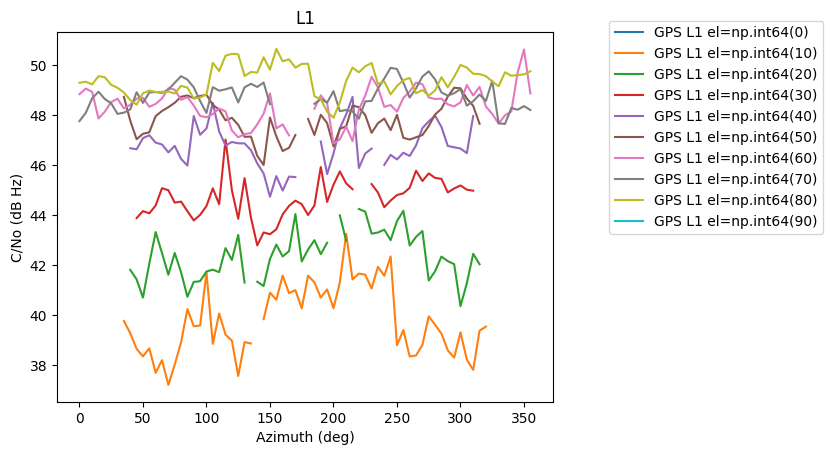

In [55]:
el_bins = np.arange(0, 100, 10)
#print(el_bins)
for n_f, f in enumerate(df.Freq.unique()):
    dff = df.query(f'Freq=="{f}"')
    fig = plt.figure()
    ax = plt.gca()
    for n_svt, svt in enumerate(df.SVType.unique()):
        dffq = dff.query(f'SVType=="{svt}"')
        if dffq.empty:
            continue
        for el in el_bins:
            dffqe = dffq.query(f'El>{el} and El<{el}+10')
            bins = pd.cut(dffqe['Az'], np.arange(0, 365, 5))
            dfe = df.groupby(by=bins, observed=False)['CNo'].agg(['mean'])
            #print(dfe.reset_index()['mean'])
            ax.plot(np.arange(0, 360, 5), dfe.reset_index()['mean'], label=f'{svt} {f} {el=}')
        break
    plt.legend()
    plt.title(f'{f}')
    plt.xlabel('Azimuth (deg)')
    plt.ylabel('C/No (dB Hz)')
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    break